In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

In [2]:
rng = Random.default_rng();

### ERO model with small noise

least eigenvalue: [0.05426011656652463, 76.13349312422297, 79.19475817482744]


DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


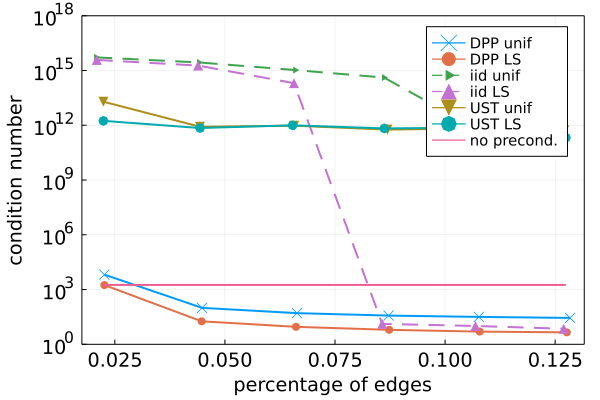

In [32]:
#rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.001

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "ERO" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

B = magnetic_incidence(meta_g)
Lap = B * B';

l = eigvals(Lap)

println("least eigenvalue: ", l[1:3])

q = 0.
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

# foldername = "figures/"
# type = "precond"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
# savefig(foldername*name)

In [33]:
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

foldername = "figures/"
name = "mag_precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

### MUN with small noise

least eigenvalue: [0.0024358309430709824, 79.99174960093896, 80.49180851289819]


DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


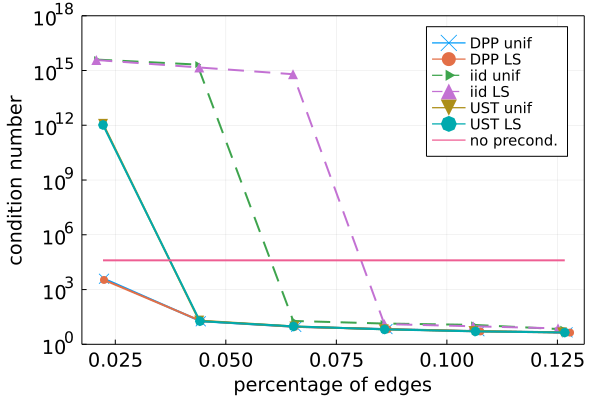

In [34]:
#rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.01

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "MUN" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

B = magnetic_incidence(meta_g)
Lap = B * B';

l = eigvals(Lap)

println("least eigenvalue: ", l[1:3])

q = 0
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

In [35]:
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

foldername = "figures/"
name = "mag_precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

### MUN with large noise

least eigenvalue: [0.2455319448752249, 80.15979654506103, 80.51150554944633]


DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


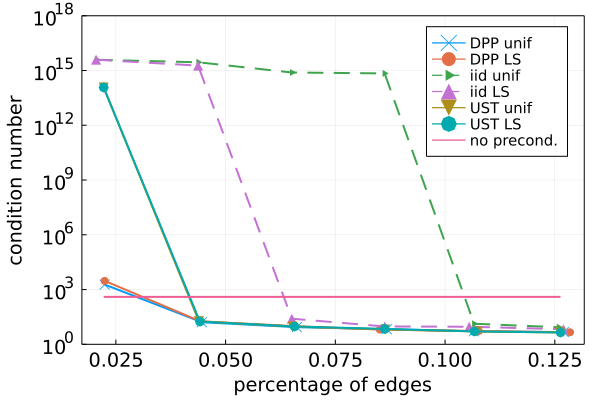

In [27]:
#rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.1

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "MUN" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

B = magnetic_incidence(meta_g)
Lap = B * B';

l = eigvals(Lap)

println("least eigenvalue: ", l[1:3])

q = 0.
n_batch = 6
n_rep = 3
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

In [25]:
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

foldername = "figures/"
name = "mag_precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

### SBM ERO


least eigenvalue: [0.059903240605523184, 0.10610389895224706, 35.55878273232277]


DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


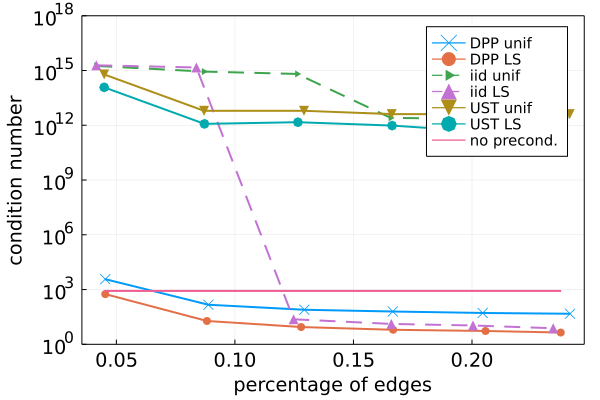

In [28]:
rng = Random.default_rng();
n = 100

planted_score = randperm(rng,n)
eta = 0.001
noise = 0.0
p_in = 0.9
p_out = 0.001

type = "SBM_ERO"
meta_g = ero_mun_sbm(rng,n,p_in,p_out,eta,noise;planted_score)
# 2 communities of size floor(n/2)

B = magnetic_incidence(meta_g)
Lap = B * B';

l = eigvals(Lap)

println("least eigenvalue: ", l[1:3])

#gplot(meta_g)

q = 0.
n_batch = 6
n_rep = 3
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

In [ ]:
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

foldername = "figures/"
name = "mag_precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

In [ ]:
gplot(meta_g)

In [ ]:
rng = Random.default_rng();
n = 200

planted_score = randperm(rng,n)
eta = 0.0
noise = 0.01
p_in = 0.8
p_out = 0.001
meta_g = ero_mun_sbm(rng,n,p_in,p_out,eta,noise;planted_score)

B = magnetic_incidence(meta_g)
Lap = B * B';

l = eigvals(Lap)

println("least eigenvalue: ", l[1:3])

#gplot(meta_g)

q = 0.
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng,q_system=1e-13)

y_limits = (1,1e18)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

In [ ]:
gplot(meta_g)

### Other plots

In [ ]:
y_limits = (0,1)
metric = "least_eig"
plot_comparison_sync(metric,D_all,y_limits;legendposition=:topright)

In [ ]:
y_limits = (0,500)
metric = "top_eig"
plot_comparison_sync(metric,D_all,y_limits;legendposition=:topright)